In [1]:
from UctZone import UctZone
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
# plt.style.use('dark_background')


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [14]:

# Change this to test different parameters
alpha = 0.05
eta = 0.4

day = 1  # How many days to simulate (8 hours a day)

n = int(3600 * 8 * 10 * day)
sigma_ann = 0.2
sigma = sigma_ann / np.sqrt(252 / day)
r_ann = 0.05
r = r_ann / (360 / day)

beta = 0.8  # CEV
A = UctZone(alpha, eta)  # for clearer plot set alpha=0.5
A.get_eff_price_CEV(n, sigma, r=r, beta=beta)  # Daily drift and volatility
A.get_exit_times(L_mode="naive")
A.get_obs_price(jump_mode="beta")

Text(0.5, 1.0, 'L_mode=naive, jump_mode=beta, 1 day, every 1/10 sec')

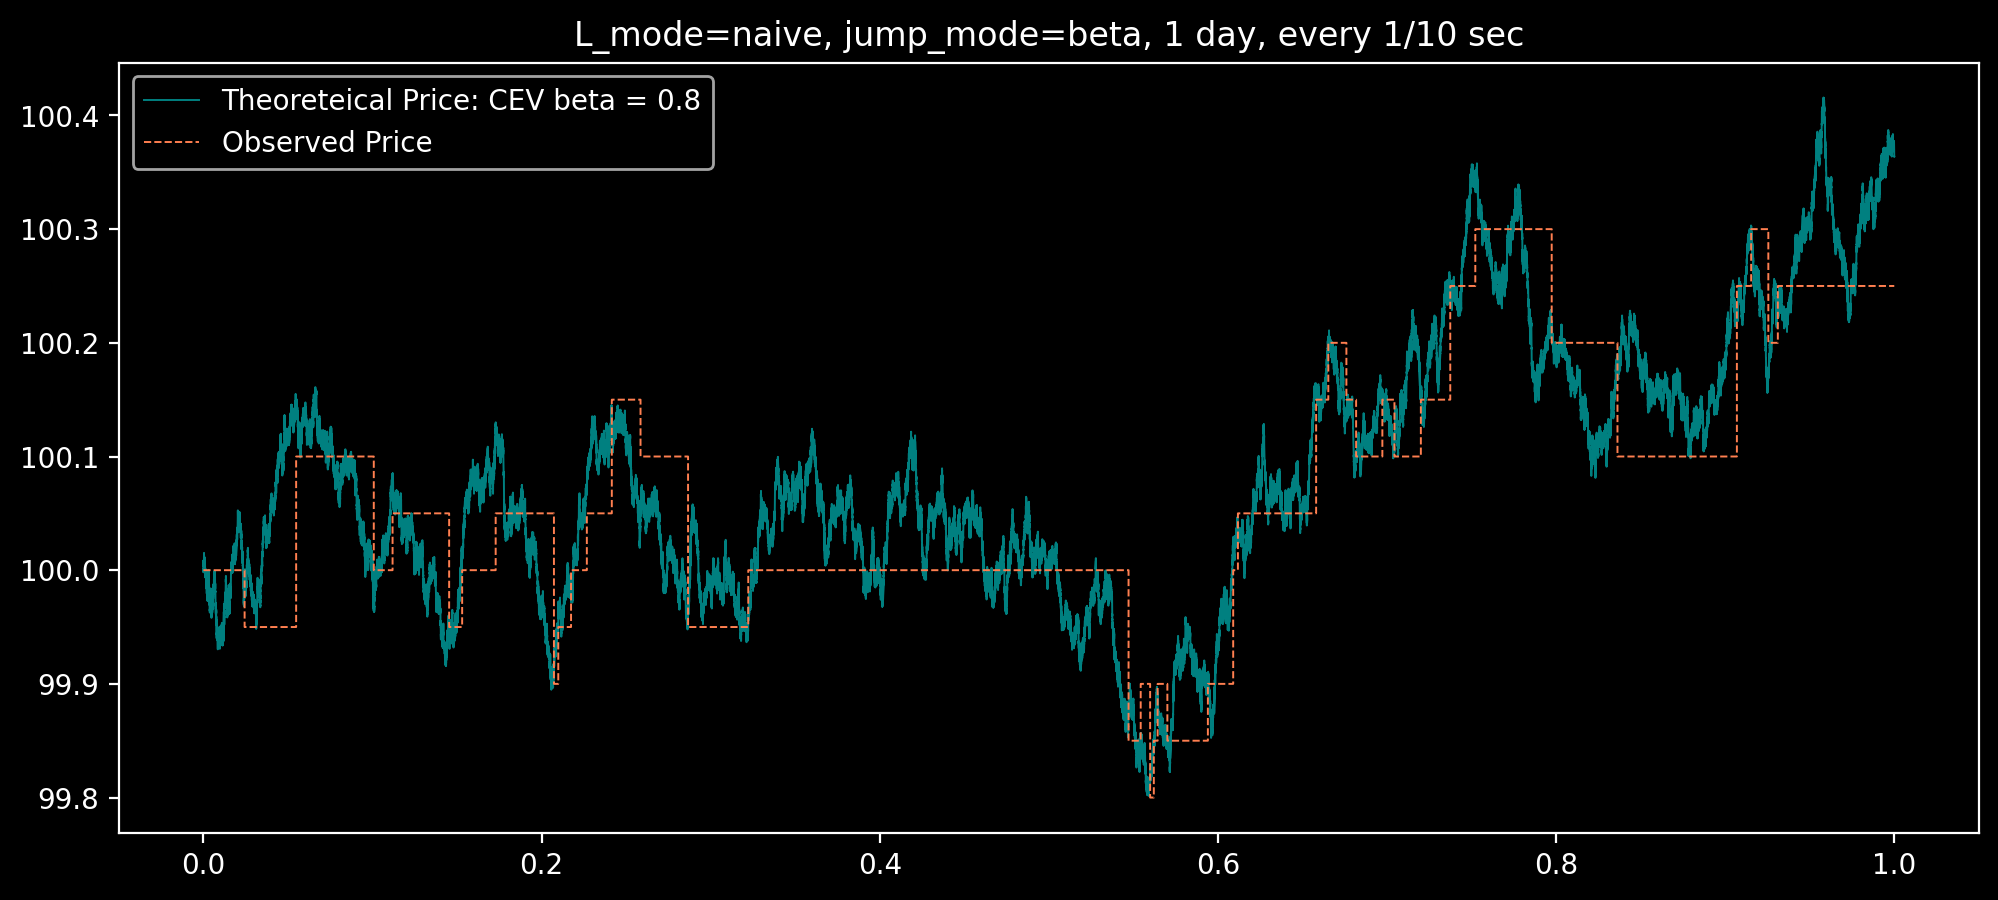

In [22]:
fig, ax = plt.subplots(figsize=(12, 5))
pd.Series(index=A.t, data=A.x).plot(
    lw=0.7, color='teal', ax=ax, label="Theoreteical Price: CEV beta = " + str(beta))  # Theoretical price
ax.step(A.t, A.p, '--',where='post', 
        color='coral', lw=0.7, label="Observed Price")  # Observed price
ax.legend()
plt.title("L_mode=naive, jump_mode=beta, 1 day, every 1/10 sec")